In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data = load_breast_cancer()
X = data.data[:, :2]
y = data.target.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1-x)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [5]:
input_neurons = 2
hidden_neurons = 3
output_neurons = 1
lr = 0.1

np.random.seed(42)
W1 = np.random.randn(input_neurons, hidden_neurons)
b1 = np.zeros((1, hidden_neurons))
W2 = np.random.randn(hidden_neurons, output_neurons)
b2 = np.zeros((1, output_neurons))

In [6]:
epochs = 800
losses =[]

for i in range(epochs):
    z1 = np.dot(X_train, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = sigmoid(z2)

    loss = mse_loss(y_train, y_pred)
    losses.append(loss)

    d_loss = y_pred - y_train
    d_z2 = d_loss * sigmoid_derivative(y_pred)
    d_W2 = np.dot(a1.T, d_z2)
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * sigmoid_derivative(a1)
    d_W1 = np.dot(X_train.T, d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    W1 -= lr * d_W1
    b1 -= lr * d_b1
    W2 -= lr * d_W2
    b2 -= lr * d_b2

    if i % 100 == 0:
        print(f"Epoch {i}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.2863
Epoch 100, Loss: 0.0729
Epoch 200, Loss: 0.0723
Epoch 300, Loss: 0.0720
Epoch 400, Loss: 0.0719
Epoch 500, Loss: 0.0718
Epoch 600, Loss: 0.0717
Epoch 700, Loss: 0.0717


In [7]:
z1 = np.dot(X_test, W1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, W2) + b2
y_pred_test = sigmoid(z2)
preds = (y_pred_test > 0.5).astype(int)
acc = np.mean(preds == y_test)
print(f"\nTest Accuracy: {acc*100:.2f}%")


Test Accuracy: 91.23%


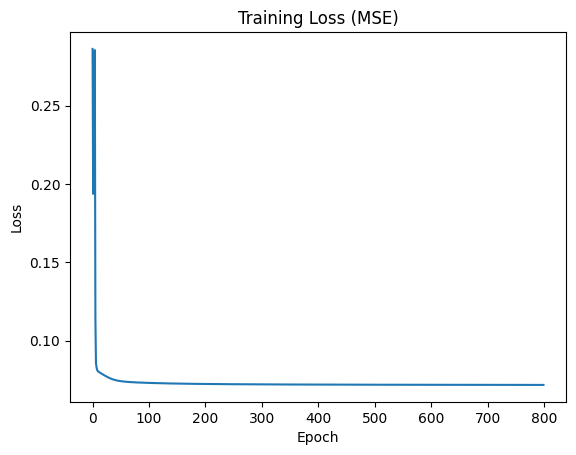

In [8]:
plt.plot(losses)
plt.title("Training Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()